<a href="https://colab.research.google.com/github/williameman-bit/TM-Data-Mining_William-Emanuel_231510047/blob/main/TM_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Setting visualisasi
%matplotlib inline
sns.set(style="whitegrid")

In [2]:
# Membaca dataset
df = pd.read_csv('Heart_Disease_Prediction.csv')

# Menampilkan 5 data teratas
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: floa

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


/tmp/ipython-input-1323018895.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart Disease', data=df, palette='viridis')


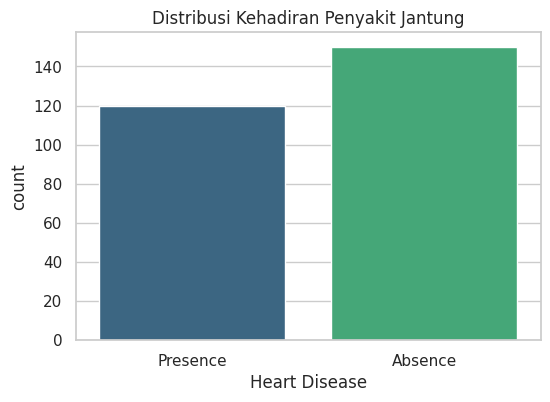

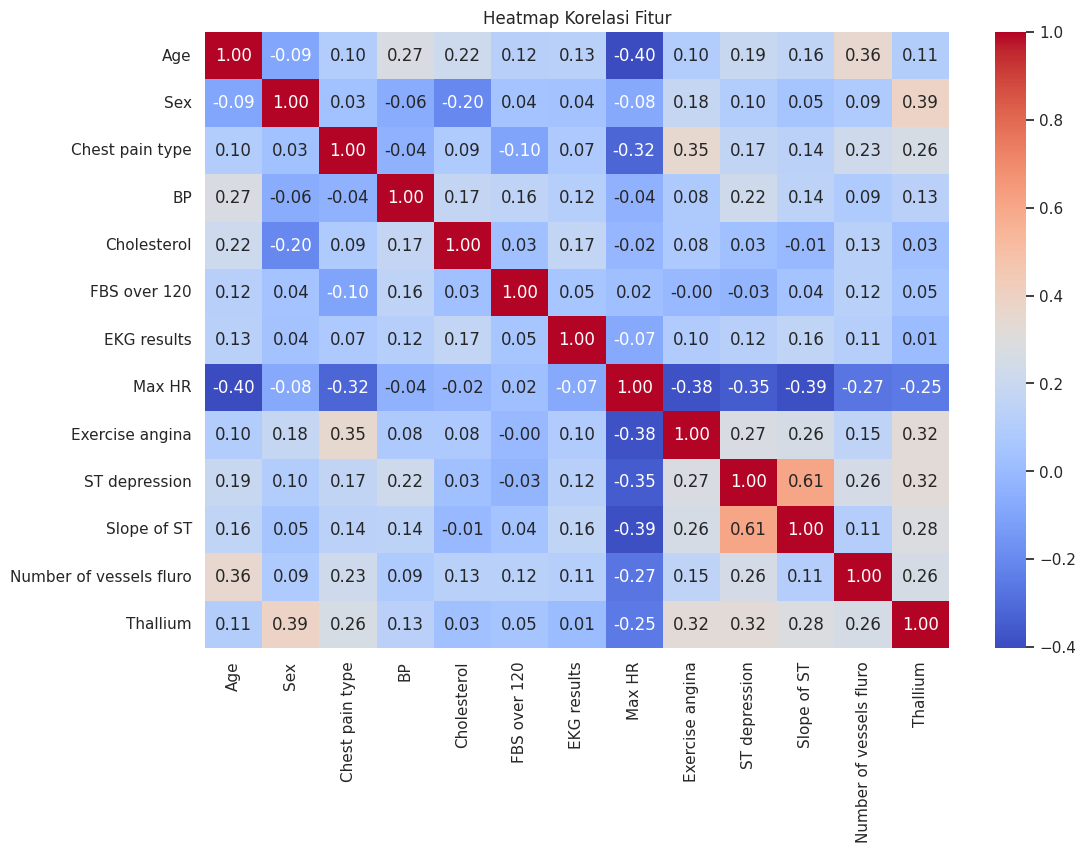

In [3]:
# Informasi dasar dataset
print("Informasi Dataset:")
df.info()

# Statistik deskriptif
print("\nStatistik Deskriptif:")
display(df.describe())

# Visualisasi distribusi target (Heart Disease)
plt.figure(figsize=(6, 4))
sns.countplot(x='Heart Disease', data=df, palette='viridis')
plt.title('Distribusi Kehadiran Penyakit Jantung')
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Fitur')
plt.show()

In [4]:
# Mengubah target 'Presence'/'Absence' menjadi 1/0
le = LabelEncoder()
df['Heart Disease'] = le.fit_transform(df['Heart Disease'])

# Memisahkan Fitur (X) dan Target (y)
X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']

# Scaling fitur (sangat penting untuk algoritma berbasis jarak)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Preprocessing selesai. Target telah di-encode (Presence: 1, Absence: 0)")

Preprocessing selesai. Target telah di-encode (Presence: 1, Absence: 0)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Jumlah Data Latih: {X_train.shape[0]}")
print(f"Jumlah Data Uji: {X_test.shape[0]}")

Jumlah Data Latih: 216
Jumlah Data Uji: 54


In [6]:
# Inisialisasi Model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Melatih Model
model.fit(X_train, y_train)

print("Model Random Forest berhasil dilatih.")

Model Random Forest berhasil dilatih.


In [7]:
# Prediksi
y_pred = model.predict(X_test)

# Hasil Evaluasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi Model: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi Model: 79.63%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        33
           1       0.78      0.67      0.72        21

    accuracy                           0.80        54
   macro avg       0.79      0.77      0.78        54
weighted avg       0.79      0.80      0.79        54



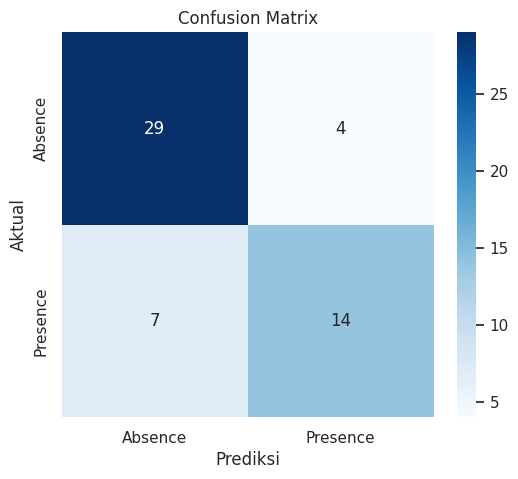

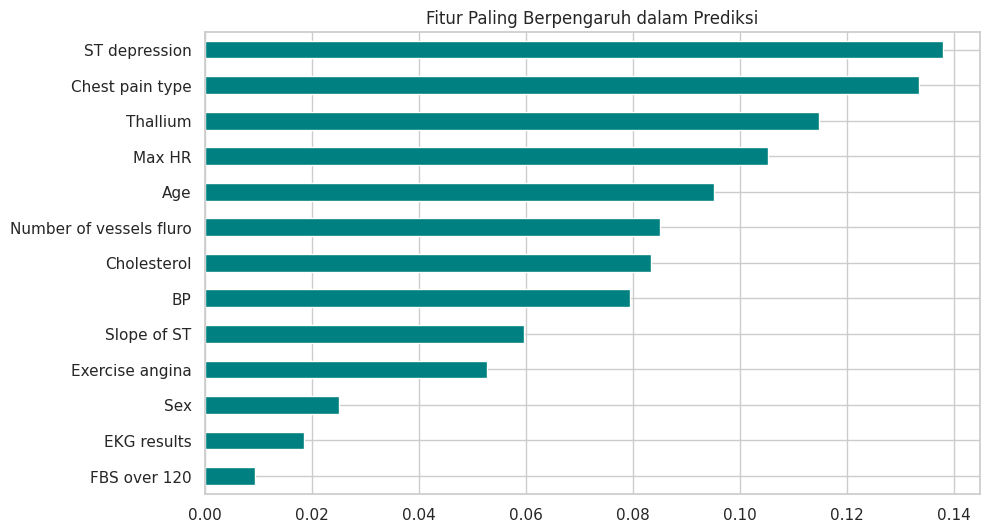

In [8]:
# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Absence', 'Presence'],
            yticklabels=['Absence', 'Presence'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# 2. Feature Importance
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
importances.sort_values().plot(kind='barh', color='teal')
plt.title('Fitur Paling Berpengaruh dalam Prediksi')
plt.show()